# Kernel SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Enter relevant column numbers
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[: , [2,3]]
y = data.iloc[: , -1]

In [8]:
# Split train-test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [39]:
# Fitting model to the train set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',
                 degree = 4,     #ignored if selected any other kernel than poly
                 random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [13]:
pd.DataFrame({'act' : y_test, 'pred' : y_pred})

,act,pred
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
60,0,0
155,0,0
261,1,1
141,0,0
214,0,1


In [41]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,64,4
1,3,29


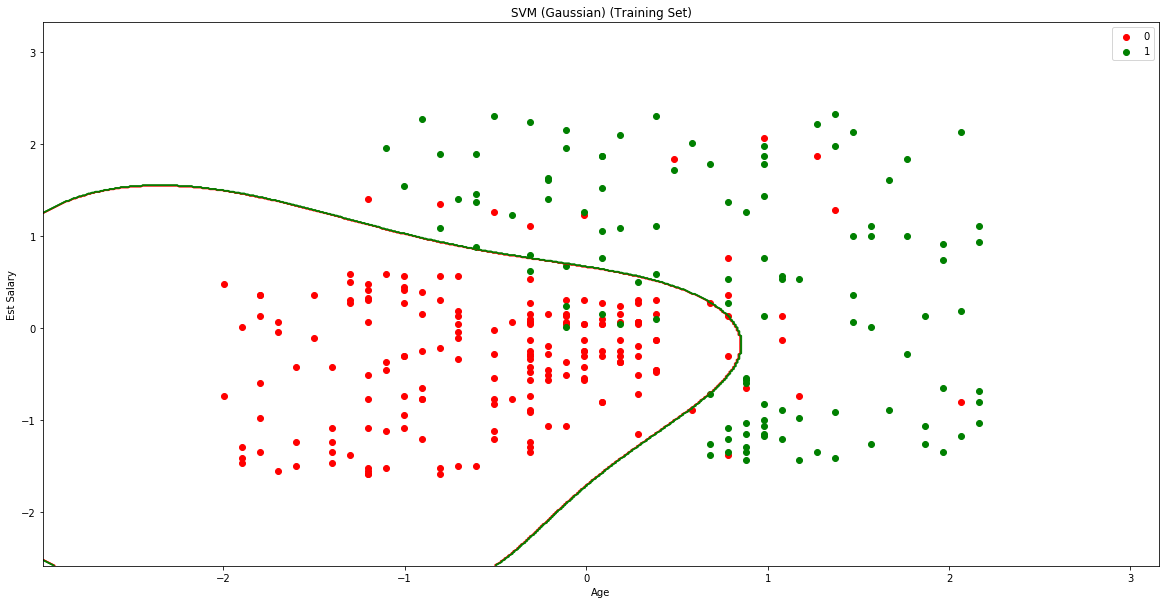

In [42]:
#Visualizing the training test results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01),
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.figure(figsize = [20,10])
plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (Gaussian) (Training Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()

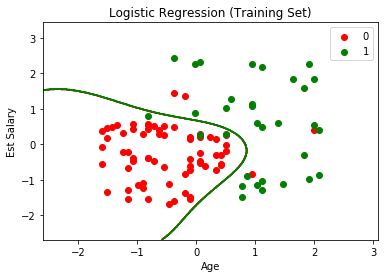

In [43]:
#Visualizing the Logistic Regression test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01), #returns coordinate matrices
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()